In [3]:
# 验证 模型复杂度 和 训练数据集大小 对 underfitting 和 overfitting 的影响

In [ ]:
# 顾名思义，就是要将 模型复杂度 和 训练数据集 都进行调整，以验证：
# 1. 复杂度 高/低 对acc的影响，
# 2. 数据集 多/少 对acc的影响。

In [1]:
import torch
import numpy as np
import sys
sys.path.append('./d2lzh/')
import d2lzh_pytorch as d2l

In [24]:
### 1.生成数据集

$y = 1.2 x - 3.4 x^2 + 5.6x^3 + 7 + \epsilon$

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 7
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + 
          true_w[1] * poly_features[:, 1] + 
          true_w[2] * poly_features[:, 2] + true_b)

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [3]:
print(features[:2], poly_features[:2], labels[:2])

tensor([[ 1.5273],
        [-1.6711]]) tensor([[ 1.5273,  2.3326,  3.5625],
        [-1.6711,  2.7925, -4.6664]]) tensor([ 20.8625, -30.6190])


In [27]:
### 2. 定义模型，训练模型，测试模型

In [4]:
# 作图函数
def semilogy(x_vals, y_vals, x_label, y_label,
            x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)
    d2l.plt.show()

In [5]:
# 开始

num_epochs = 200

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    
    # 准备（加载）训练数据，测试数据
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    # 定义模型(pytorch已经内置初始化参数)
    net = torch.nn.Linear(train_features.shape[-1], 1)
    
    
    # 损失函数
    loss = torch.nn.MSELoss()
    
    # 优化算法
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    
    # 准备好一切原料后，开始正式的训练
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)       #####模型
            ls = loss(y_hat, y.view(-1, 1))#####损失函数
            optimizer.zero_grad() #### 梯度置零
            ls.backward()#####反向传播
            optimizer.step()#####优化策略
        
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        
        # 遍历完一次训练数据，获得模型，分别计算当前Ｅpoch的train损失和loss损失．
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    
    print('final train loss', train_ls[-1], 'test loss', test_ls[-1])
    
    # 获得所有loss数据，绘图
    semilogy(x_vals=range(1, num_epochs + 1), y_vals=train_ls,
            x_label='epochs', y_label='loss',
            x2_vals=range(1, num_epochs + 1), y2_vals=test_ls,
             legend=['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)   
    
    

In [44]:
### 三阶多项式函数拟合（正常）

final train loss 0.00012499760487116873 test loss 0.00010828205267898738


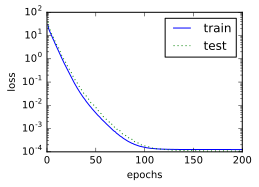

weight: tensor([[ 1.1991, -3.3992,  5.6006]]) 
bias: tensor([7.0006])


In [6]:
fit_and_plot(poly_features[:n_train, :], 
            poly_features[n_train:, :],
            labels[:n_train], labels[n_train:])

In [46]:
### 线性函数拟合（欠拟合）

final train loss 88.63382720947266 test loss 197.61767578125


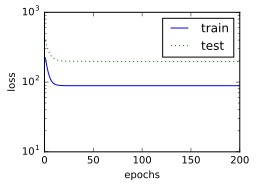

weight: tensor([[15.3849]]) 
bias: tensor([3.2643])


In [7]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

In [48]:
###  训练样本不足（过拟合）

final train loss 2.0830862522125244 test loss 11.977684020996094


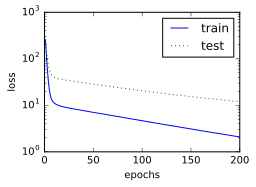

weight: tensor([[-0.0307, -1.7606,  6.0245]]) 
bias: tensor([2.8960])


In [11]:
fit_and_plot(poly_features[0:4, :], poly_features[n_train:, :],
            labels[0:4], labels[n_train:])